In [11]:
import librosa
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from IPython import display
from scipy.signal import lfilter, butter

In [7]:
#Constants
pre_emph_alpha = 0.97
frame_size = 0.025
frame_stride = 0.01
sample_rate = 16000
NFFT = 512
frame_length

In [4]:
def pre_emphasis(signal):
    alpha = pre_emph_alpha
    emphasized_signal = np.append(signal[0], signal[1:] - alpha * signal[:-1])
    return emphasized_signal

In [83]:
def signal_to_frames(emphasized_signal):    
    frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
    signal_length = len(emphasized_signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_length))
    pad_signal = np.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    return frames

In [ ]:
def hamming(frames):
    frames *= np.hamming(frame_length)
    return frames

In [ ]:
def stft(frames):
    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
    return pow_frames

In [3]:
#Functions for fft spectrum. Copied from 'https://github.com/linhdvu14/vggvox-speaker-identification/blob/master'
def remove_dc_and_dither(sin, sample_rate):
	if sample_rate == 16e3:
		alpha = 0.99
	elif sample_rate == 8e3:
		alpha = 0.999
	else:
		print("Sample rate must be 16kHz or 8kHz only")
		exit(1)
	sin = lfilter([1,-1], [1,-alpha], sin)
	dither = np.random.random_sample(len(sin)) + np.random.random_sample(len(sin)) - 1
	spow = np.std(dither)
	sout = sin + 1e-6 * spow * dither
	return sout

In [135]:
pwd

'/home/techresearch/Murtaza/Projects/Speaker Identification/2D-cnn Murtaza'

In [4]:
audio_files = glob("/data/techresearch/Murtaza/vox1/dev/wav/*/*.wav")

In [38]:
signal, _ = librosa.load(sr=sample_rate, mono=True, path=audio_files[1])
#signal = signal[:sample_rate*3]

In [44]:
display.Audio(data=signal, rate=sample_rate)

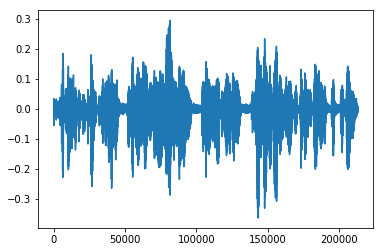

In [40]:
plt.plot(signal)

In [18]:
signal = pre_emphasis(signal)

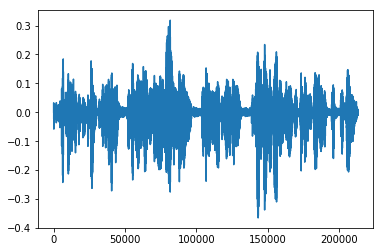

In [42]:
plt.plot(signal)

In [162]:
frames = signal_to_frames(signal)

In [114]:
frames.shape

(298, 400)

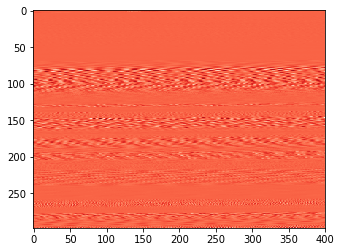

In [115]:
plt.imshow(frames[0:500], cmap='Reds')

In [116]:
signal = np.ravel(frames)

##### Observations: 
- Voice gets significantly changed after applying pre-emphasis. An indication it should not be used. Further testing on the mtbc test set shows that disabling pre-emphasis improves accuracy. 